In [2]:
## Import all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [13]:
# Load the user data from the CSV file
users_data = pd.read_csv('data/users_data.csv')  # Load the data into a pandas DataFrame

# Remove the dollar sign ('$') from 'yearly_income' and convert the column to a numeric float type
users_data['yearly_income'] = users_data['yearly_income'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Remove the dollar symbol from 'total_debt' and convert the column to a numeric float type
users_data['total_debt'] = users_data['total_debt'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Remove the dollar symbol from 'per_capita_income' and convert the column to a numeric float type
users_data['per_capita_income'] = users_data['per_capita_income'].replace({'\$': '', ',': ''}, regex=True).astype(float) 

# Display the dataframe to view the data
users_data.head(2)


,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278.0,59696.0,127613.0,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891.0,77254.0,191349.0,701,5


In [14]:
# Check for null values across all columns in the 'user_data' dataframe
null_columns = users_data.isnull().sum()  # Sum the null values per column

# Print columns that have null values (if any)
print("Columns with null values:")
print(null_columns[null_columns > 0])  # Display only the columns that have more than 0 null values

Columns with null values:
Series([], dtype: int64)


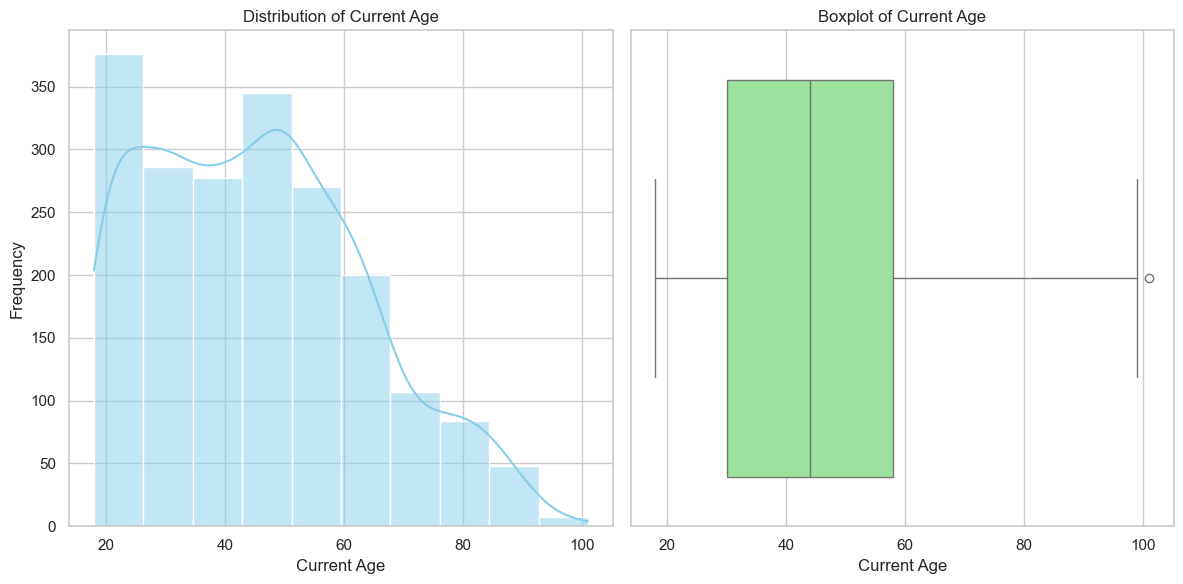

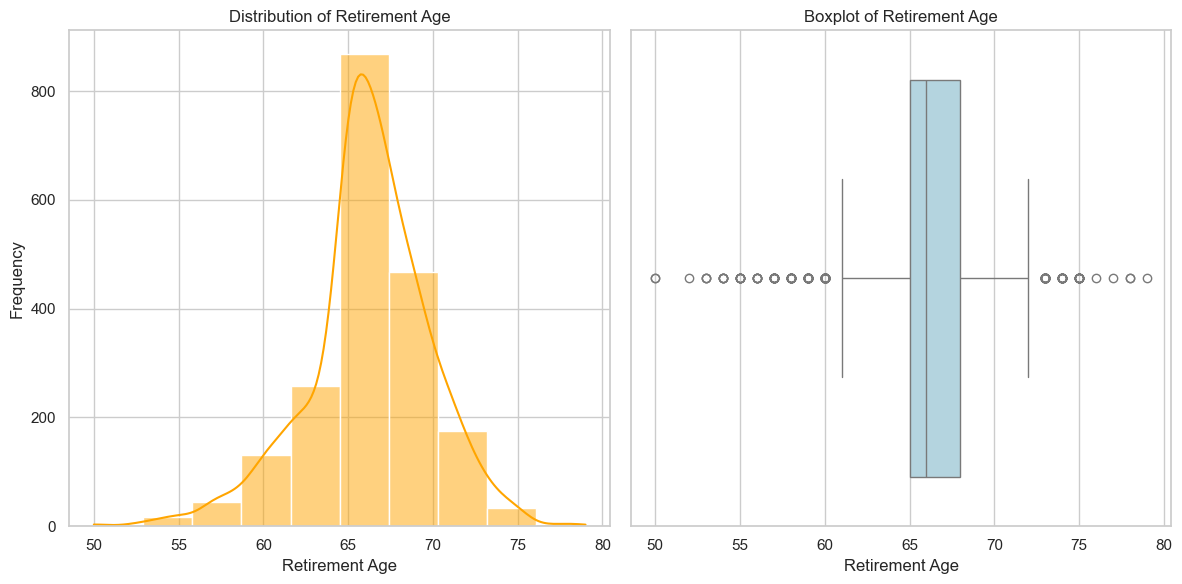

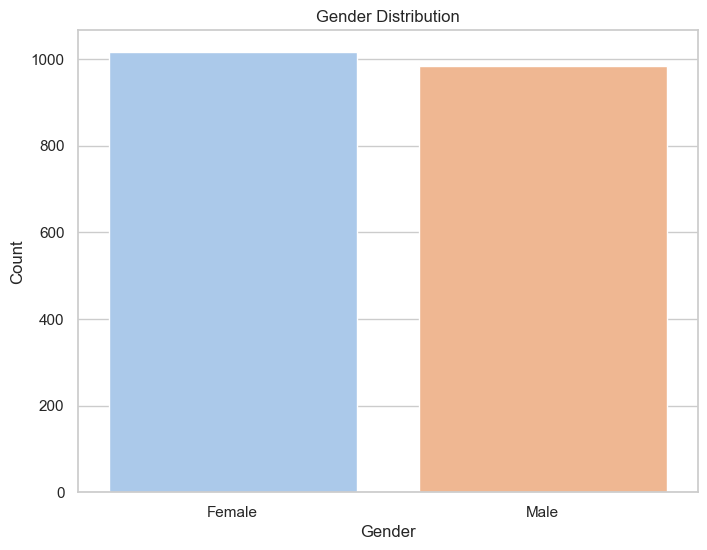

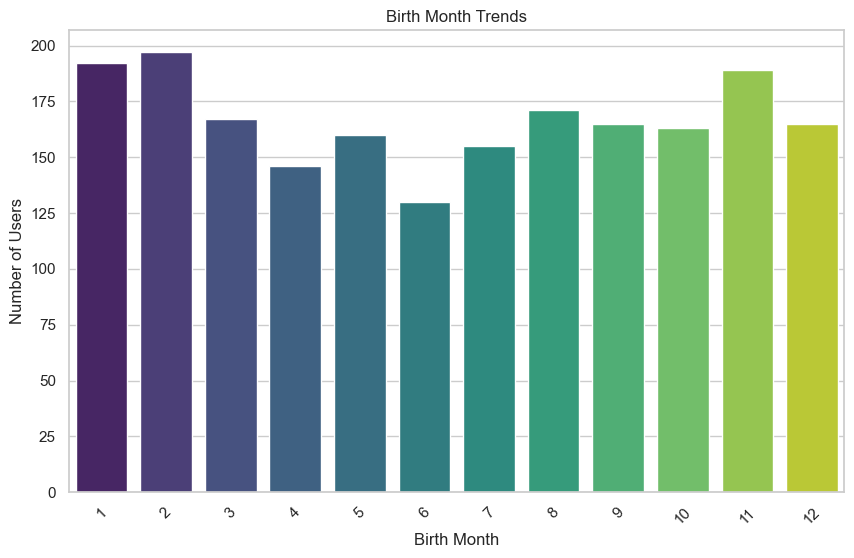

In [15]:
# Demographics Analysis

# Set the style for the plots
sns.set(style="whitegrid")  # Use white grid style for the plots

# Plot the distribution of current_age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot with 1 row, 2 columns, and place in the first column
sns.histplot(users_data['current_age'], kde=True, bins=10, color='skyblue')  # Plot histogram for 'current_age'
plt.title('Distribution of Current Age')  # Set the title
plt.xlabel('Current Age')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis

# Boxplot for current_age
plt.subplot(1, 2, 2)  # Place boxplot in the second column of the subplot
sns.boxplot(x=users_data['current_age'], color='lightgreen')  # Plot boxplot for 'current_age'
plt.title('Boxplot of Current Age')  # Set the title
plt.xlabel('Current Age')  # Label for the x-axis

plt.tight_layout()  # Adjust layout to avoid overlapping elements
plt.show()  # Display the plot

# Plot the distribution of retirement_age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot with 1 row, 2 columns, and place in the first column
sns.histplot(users_data['retirement_age'], kde=True, bins=10, color='orange')  # Plot histogram with KDE for 'retirement_age'
plt.title('Distribution of Retirement Age')  # Set the title
plt.xlabel('Retirement Age')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis

# Boxplot for retirement_age
plt.subplot(1, 2, 2)  # Place boxplot in the second column of the subplot
sns.boxplot(x=users_data['retirement_age'], color='lightblue')  # Plot boxplot for 'retirement_age'
plt.title('Boxplot of Retirement Age')  # Set the title
plt.xlabel('Retirement Age')  # Label for the x-axis

plt.tight_layout()  # Adjust layout to avoid overlapping elements
plt.show()  # Display the plot

# Analyze gender distribution
plt.figure(figsize=(8, 6))  # Create a figure for gender distribution plot
gender_counts = users_data['gender'].value_counts()  # Count occurrences of each gender
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')  # Plot a barplot for gender distribution
plt.title('Gender Distribution')  # Set the title
plt.xlabel('Gender')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()  # Display the plot

# Birth month trends
plt.figure(figsize=(10, 6))  # Create a figure for birth month trends plot
birth_month_counts = users_data['birth_month'].value_counts().sort_index()  # Count occurrences of each birth month and sort by index
sns.barplot(x=birth_month_counts.index, y=birth_month_counts.values, palette='viridis')  # Plot a barplot for birth month trends
plt.title('Birth Month Trends')  # Set the title
plt.xlabel('Birth Month')  # Label for the x-axis
plt.ylabel('Number of Users')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


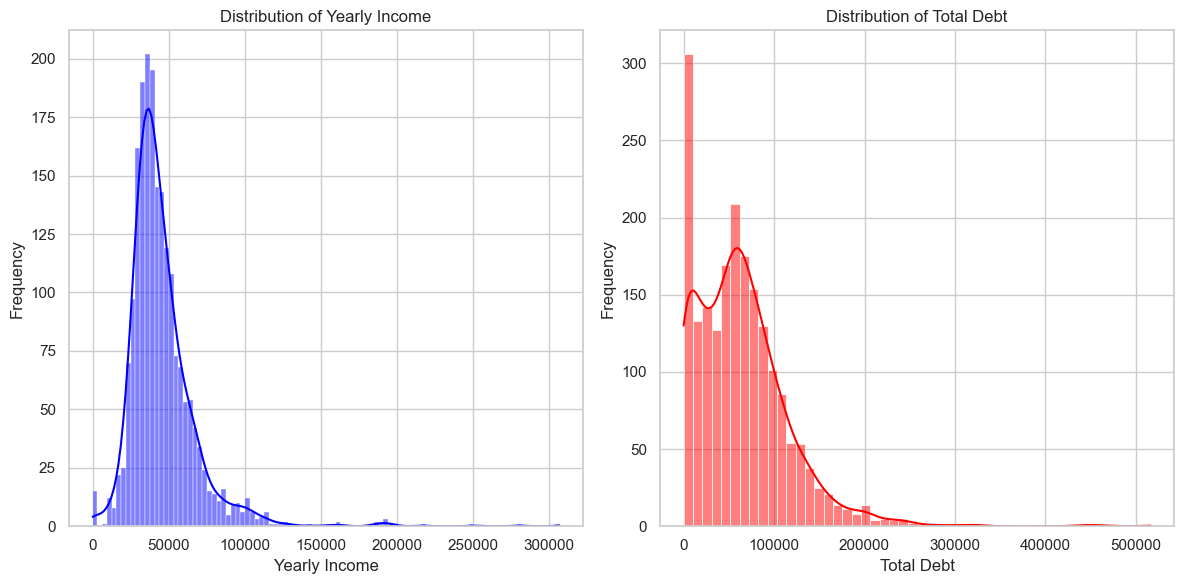

In [16]:
# Distribution of yearly_income and total_debt

plt.figure(figsize=(12, 6))  # Create a figure with specified dimensions

# Distribution of Yearly Income
plt.subplot(1, 2, 1) 
sns.histplot(users_data['yearly_income'], kde=True, color='blue')  # Plot histogram for 'yearly_income'
plt.title('Distribution of Yearly Income')  # Set the title for the subplot
plt.xlabel('Yearly Income')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis

# Distribution of Total Debt
plt.subplot(1, 2, 2)  # Create a subplot and place it in the second column
sns.histplot(users_data['total_debt'], kde=True, color='red')  # Plot histogram with KDE for 'total_debt'
plt.title('Distribution of Total Debt')  # Set the title for the subplot
plt.xlabel('Total Debt')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis

# Display the plots
plt.tight_layout()
plt.show() 


Correlation Matrix:
                credit_score  yearly_income  total_debt
credit_score       1.000000       0.000167   -0.104537
yearly_income      0.000167       1.000000    0.550641
total_debt        -0.104537       0.550641    1.000000


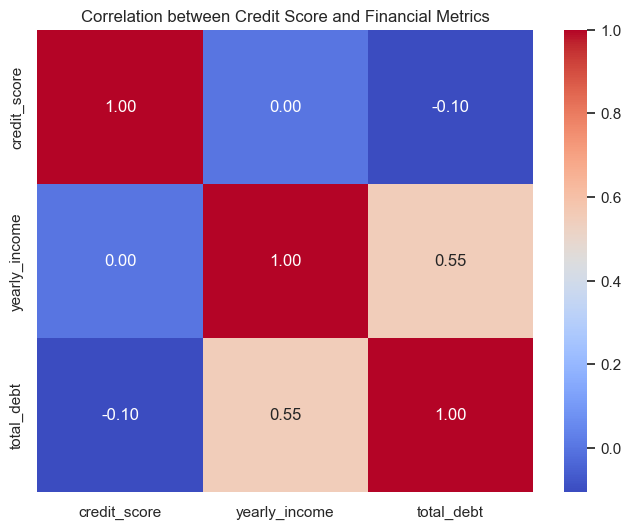

In [17]:
# Correlation between credit_score and financial metrics

# Calculate the correlation matrix for selected financial metrics
correlation_matrix = users_data[['credit_score', 'yearly_income', 'total_debt']].corr()
print("Correlation Matrix:\n", correlation_matrix)  # correlation matrix

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Create heatmap with annotations
plt.title('Correlation between Credit Score and Financial Metrics')  # Title for the heatmap
# Display the heatmap
plt.show()


Outliers in Per Capita Income:
        id  current_age  retirement_age  birth_year  birth_month  gender  \
3     708           63              63        1957            1  Female   
21    777           18              65        2002            1    Male   
58   1452           46              59        1973            5  Female   
84   1014           54              70        1965            9  Female   
453   236           36              65        1983            3  Female   

                    address  latitude  longitude  per_capita_income  \
3          3 Madison Street     40.71     -73.99           163145.0   
21          970 Essex Drive     37.37    -122.21           106305.0   
58          524 Ocean Drive     29.76     -95.38            95039.0   
84   393 Mountain View Lane     33.60    -117.82            96516.0   
453      4137 Bayview Drive     29.70     -95.46            79100.0   

     yearly_income  total_debt  credit_score  num_credit_cards  
3         249925.0    202

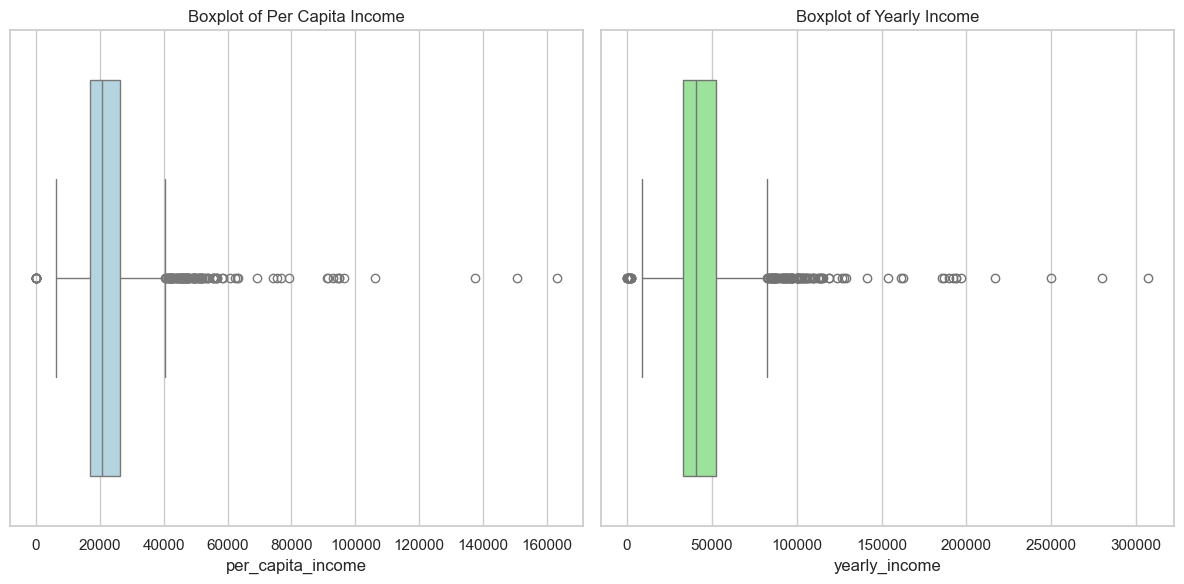

In [18]:
# Identify outliers in per_capita_income and yearly_income using Z-scores

# Calculate Z-scores for 'per_capita_income' and 'yearly_income'
z_scores_per_capita_income = np.abs(stats.zscore(users_data['per_capita_income'])) 
z_scores_yearly_income = np.abs(stats.zscore(users_data['yearly_income'])) 

# Define a threshold for identifying outliers
threshold = 3  # Threshold for Z-scores

# Filter data to identify outliers based on the threshold
outliers_per_capita_income = users_data[z_scores_per_capita_income > threshold]  # Outliers in per capita income
outliers_yearly_income = users_data[z_scores_yearly_income > threshold]  # Outliers in yearly income

# Display outliers
print("Outliers in Per Capita Income:\n", outliers_per_capita_income.head())  # Print identified outliers for per capita income
print("Outliers in Yearly Income:\n", outliers_yearly_income.head())  # Print identified outliers for yearly income

# Optionally, visualize the outliers using boxplots
plt.figure(figsize=(12, 6))  # Set figure size

# Boxplot for Per Capita Income
plt.subplot(1, 2, 1)
sns.boxplot(x=users_data['per_capita_income'], color='lightblue')  # Boxplot for per capita income
plt.title('Boxplot of Per Capita Income')  # Title for the plot

# Boxplot for Yearly Income
plt.subplot(1, 2, 2)  # Create the second subplot
sns.boxplot(x=users_data['yearly_income'], color='lightgreen')  # Boxplot for yearly income
plt.title('Boxplot of Yearly Income')  # Title for the plot

plt.tight_layout()  # Adjust subplot layout
plt.show()  # Display the plots


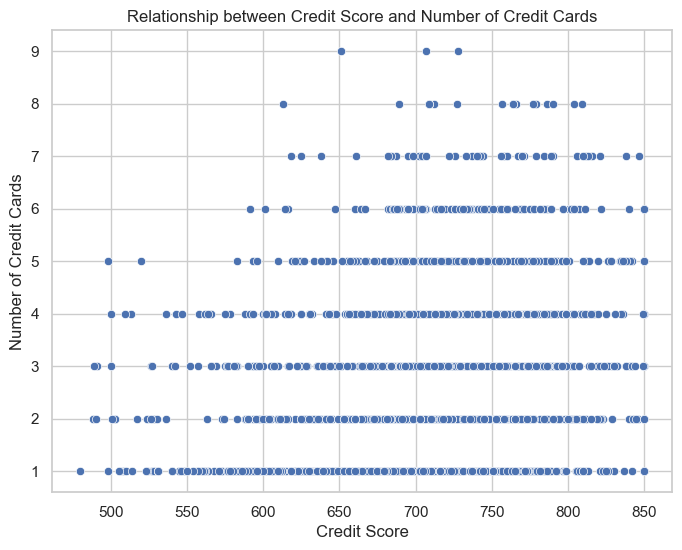

In [19]:
# Relationship between credit_score and num_credit_cards
plt.figure(figsize=(8, 6))
sns.scatterplot(x='credit_score', y='num_credit_cards', data=users_data)
plt.title('Relationship between Credit Score and Number of Credit Cards')
plt.xlabel('Credit Score')
plt.ylabel('Number of Credit Cards')
plt.show()

In [20]:
# correlation between credit_score and num_credit_cards
correlation = users_data[['credit_score', 'num_credit_cards']].corr()
print("Correlation between Credit Score and Number of Credit Cards:\n", correlation)

Correlation between Credit Score and Number of Credit Cards:
                   credit_score  num_credit_cards
credit_score          1.000000          0.237935
num_credit_cards      0.237935          1.000000


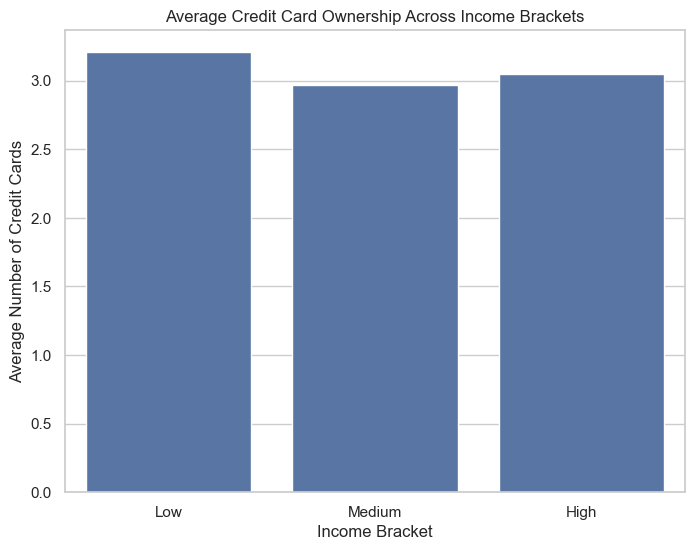

In [21]:
# Average credit card ownership across income brackets
# Define income brackets: low, medium, high based on yearly income percentiles
income_brackets = pd.qcut(users_data['yearly_income'], q=3, labels=['Low', 'Medium', 'High'])

# Add the income brackets to the DataFrame
users_data['income_bracket'] = income_brackets

# Calculate average number of credit cards across income brackets
avg_credit_cards = users_data.groupby('income_bracket')['num_credit_cards'].mean().reset_index()

# Plot average credit card ownership across income brackets
plt.figure(figsize=(8, 6))
sns.barplot(x='income_bracket', y='num_credit_cards', data=avg_credit_cards)
plt.title('Average Credit Card Ownership Across Income Brackets')
plt.xlabel('Income Bracket')
plt.ylabel('Average Number of Credit Cards')
plt.show()

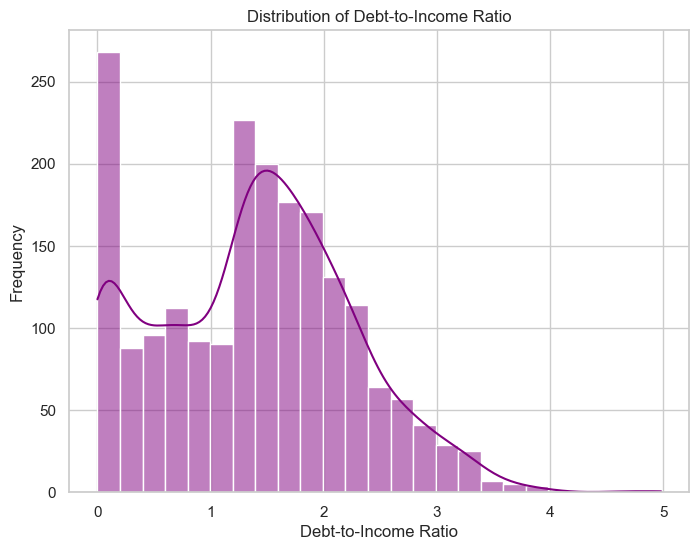

Summary Statistics of Debt-to-Income Ratio:
 count    2000.000000
mean        1.381693
std         0.869225
min         0.000000
25%         0.693580
50%         1.420996
75%         1.958985
max         4.978649
Name: debt_to_income_ratio, dtype: float64


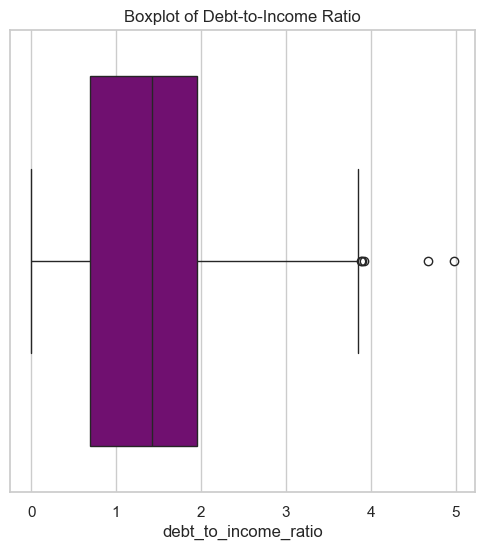

In [22]:
# Derived Debt-to-Income (DTI) ratio column
users_data['debt_to_income_ratio'] = users_data['total_debt'] / users_data['yearly_income']

# Analyze the distribution of the debt-to-income ratio
plt.figure(figsize=(8, 6))

# Histogram of Debt-to-Income Ratio
sns.histplot(users_data['debt_to_income_ratio'], kde=True, color='purple') ## Plot histogram 
plt.title('Distribution of Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

# Summary statistics of the Debt-to-Income Ratio
dti_stats = users_data['debt_to_income_ratio'].describe()
print("Summary Statistics of Debt-to-Income Ratio:\n", dti_stats)

# Optional: Boxplot to visualize outliers
plt.figure(figsize=(6, 6))
sns.boxplot(x=users_data['debt_to_income_ratio'], color='purple')
plt.title('Boxplot of Debt-to-Income Ratio')
plt.show()